In [1]:
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as de

In [2]:
nx=128
ny=128
Lx = 2*np.pi

In [3]:
x_basis = de.Fourier('x', nx, dealias=3/2)
y_basis = de.Fourier('y', ny, dealias=3/2)

domain = de.Domain([x_basis,y_basis], grid_dtype=np.float64)

In [4]:
psi = domain.new_field(name='psi')

In [5]:
psi['c'].shape

(64, 127)

In [6]:
b = domain.bases[0]

In [7]:
b.grid().shape

(128,)

In [8]:
b.wavenumbers.shape

(64,)

Needed to develop new method to return wavenumber grid for assignment in coefficient space. Not sure what to call it, but for now it's `.coeffs` to mirror `.grids`.

In [9]:
k_grid = psi.domain.coeffs()

In [10]:
coeff_mask = ((np.abs(k_grid[0]) > 14) & (np.abs(k_grid[0]) < 20)) & (np.abs(k_grid[1]) > 14) & (np.abs(k_grid[1]) < 20)

In [11]:
coeff_mask.shape

(64, 127)

Want to assign to coefficients only where the mask is true; use `coeff_mask.sum()` for this.

In [38]:
psi['c'][coeff_mask] = np.exp(2*np.pi*1j*np.random.randn(coeff_mask.sum()))

In [36]:
Q = np.random.randn(coeff_mask.sum()) + 1j*np.random.randn(coeff_mask.sum())
print(Q.shape)

(25,)


<IPython.core.display.Javascript object>


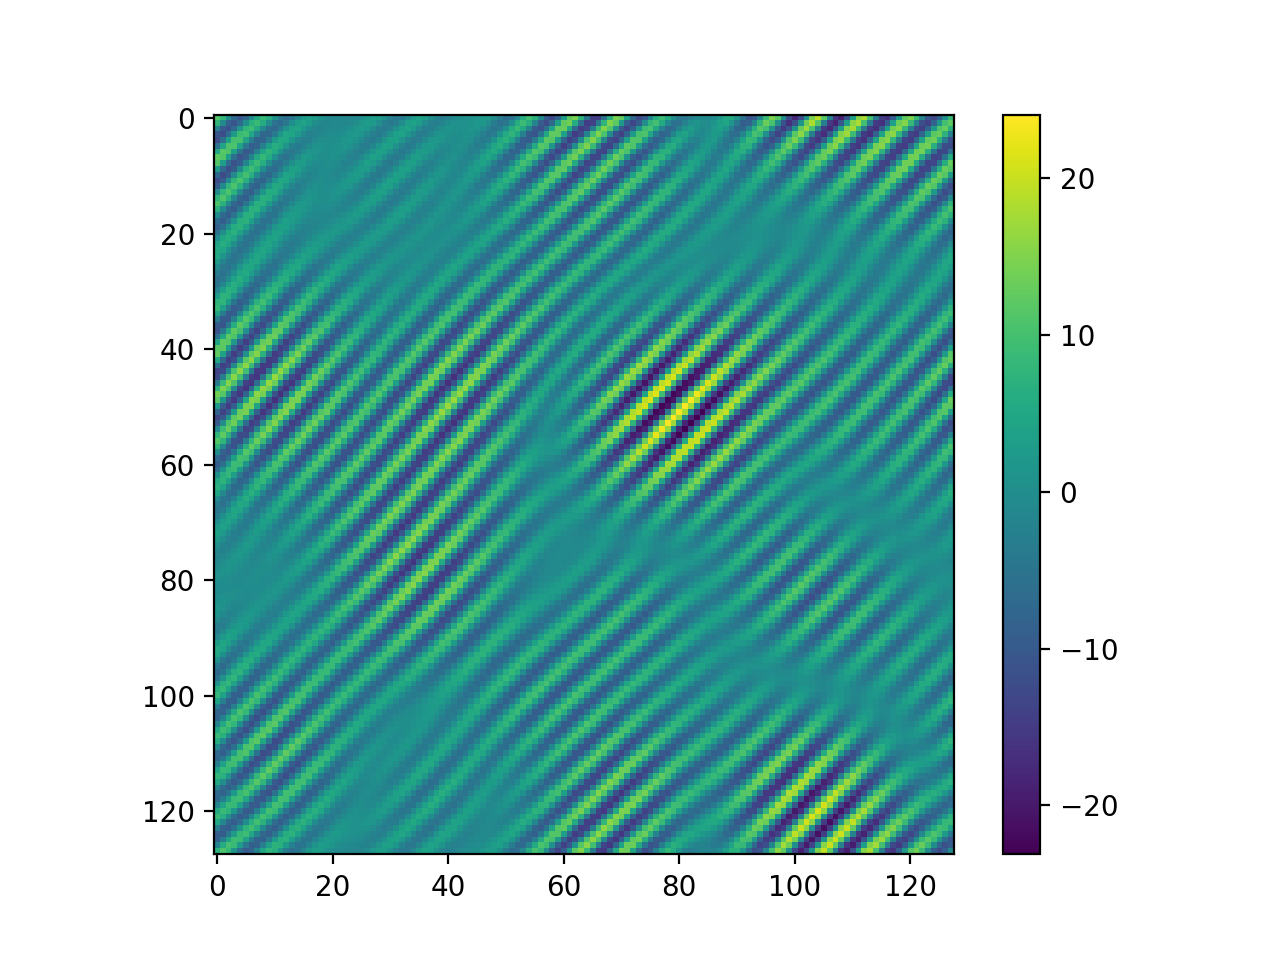

In [39]:
plt.figure()
plt.imshow(psi['g'])
plt.colorbar()

<IPython.core.display.Javascript object>


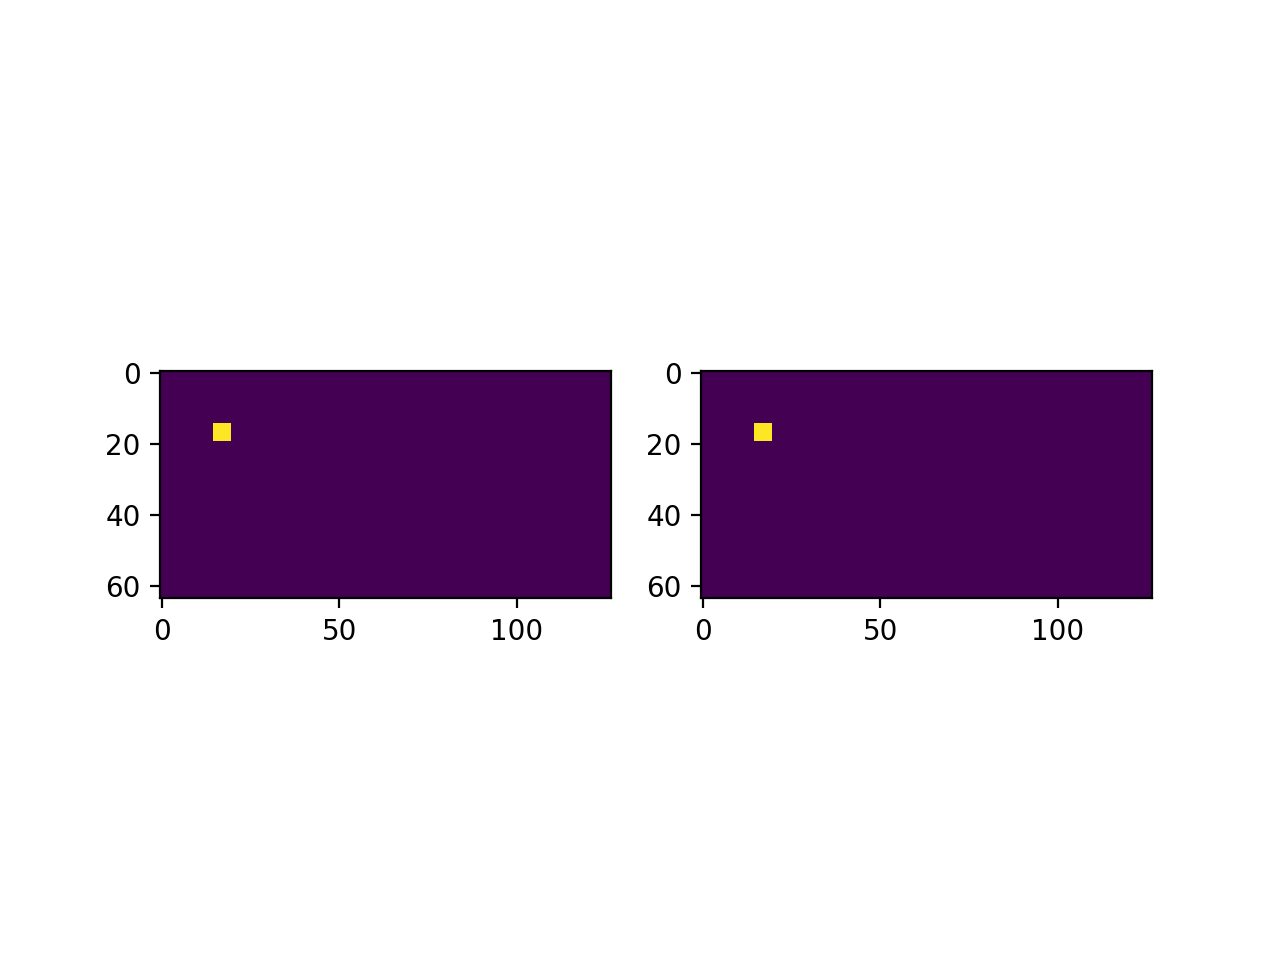

In [33]:
plt.figure()
plt.subplot(121)
plt.imshow(psi['c'].real)
plt.subplot(122)
plt.imshow(psi['c'].imag)

In [40]:
psi['c'][coeff_mask] = np.random.randn(coeff_mask.sum()) + 1j*np.random.randn(coeff_mask.sum())

<IPython.core.display.Javascript object>


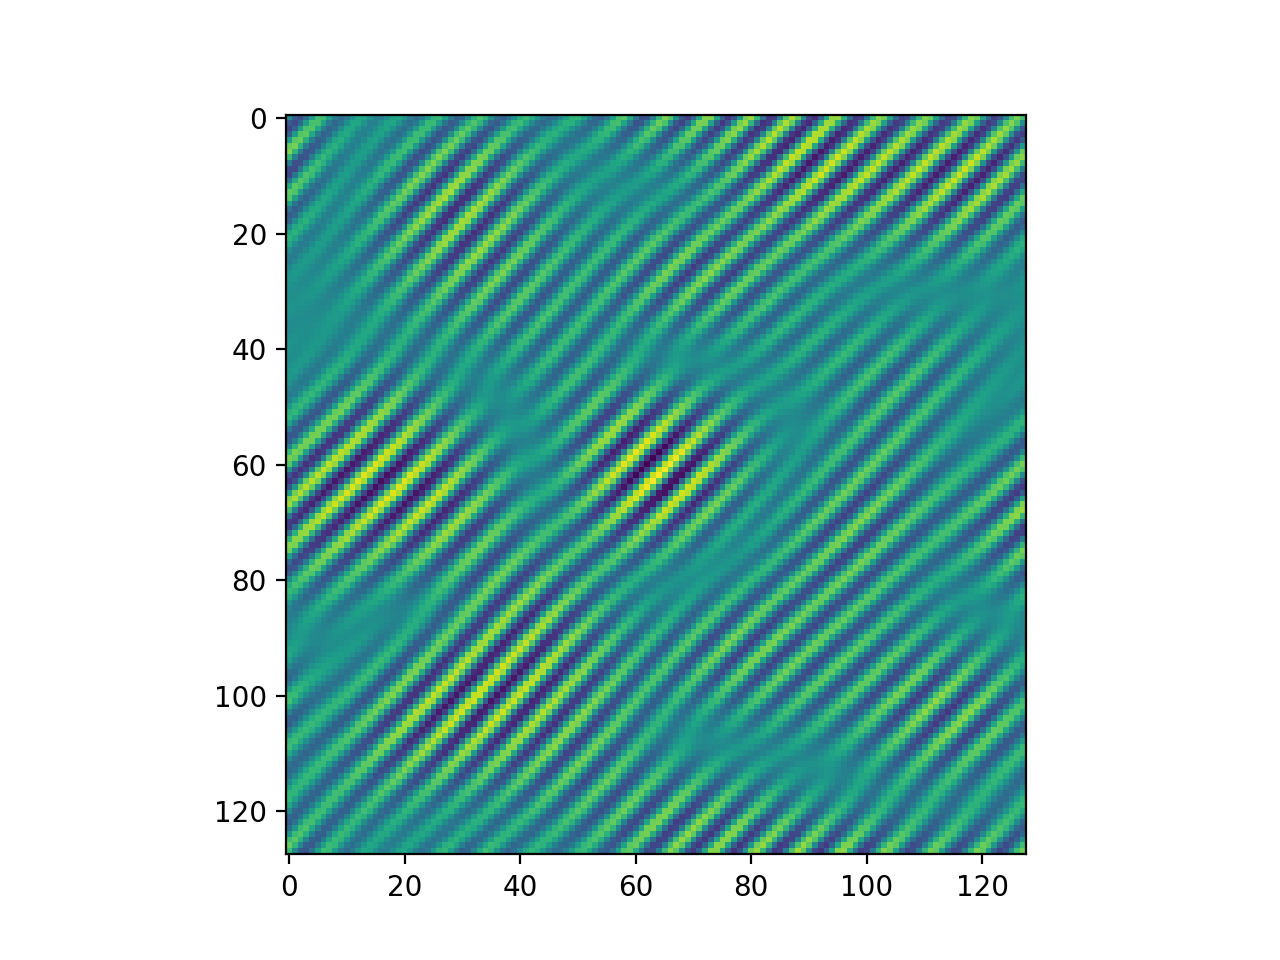

In [41]:
plt.figure()
plt.imshow(psi['g'])

Now need to normalize, since this is clearly not normalized correctly.

In [18]:
psi['g'].min(), psi['g'].max()

(-35.244831356651005, 35.683966211601295)

In [19]:
np.random.randn?

In [20]:
2.5**2

6.25

In [21]:
np.array([[4,5,6],[7,8,9]])

array([[4, 5, 6],
       [7, 8, 9]])